  ## Approach
  Dataset taken from Data Mendeley https://data.mendeley.com/datasets/wj9rwkp9c2/1

Handles missing values, especially for attributes that cannot be zero (e.g., 'Urea', 'Cr', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'). The dataset is scaled to normalize values for better model performance.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'Dataset_of_Diabetes.csv'
data = pd.read_csv(file_path)

# Replace zeros with NaN and fill with median values
columns_with_missing_values = ['Urea', 'Cr', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
for col in columns_with_missing_values:
    data[col] = data[col].replace(0, np.nan)  # Replace 0 with NaN
    data[col] = data[col].fillna(data[col].median())  # Fill NaN with median value

# Drop columns that are not necessary for the model
columns_to_drop = ['ID', 'No_Pation']  # Drop ID and No_Pation columns
data = data.drop(columns=columns_to_drop)

# Map the 'CLASS' column to numerical values ('N': 0, 'P': 1, 'Y': 2)
data['CLASS'] = data['CLASS'].map({'N': 0, 'P': 1, 'Y': 2})

# Convert categorical variables like 'Gender' to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_columns = data.columns.drop(['CLASS'])  # Exclude the target column
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Save the cleaned and scaled data to a new CSV file
cleaned_file_path = 'cleaned_data.csv'
data.to_csv(cleaned_file_path, index=False)

print(f'Cleaned and scaled data saved to {cleaned_file_path}')


Cleaned and scaled data saved to cleaned_data.csv


### Logistic Regression

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/6v/hqd4cvbx0j9bm1v2b1jp1b2c0000gn/T/ipykernel_2278/804999066.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Check for NaN values in all columns
print("Checking for NaN values in all columns:")
print(data.isna().sum())

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Check again to ensure there are no NaN values in the target variable
print("Checking for NaN values in target variable after cleaning:")
print(data['CLASS'].isna().sum())


Checking for NaN values in all columns:
AGE         0
Urea        0
Cr          0
HbA1c       0
Chol        0
TG          0
HDL         0
LDL         0
VLDL        0
BMI         0
CLASS       5
Gender_M    0
Gender_f    0
dtype: int64
Checking for NaN values in target variable after cleaning:
0


In [8]:
# Separate features (X) and target (y)
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Ensure there are no NaN values in the feature set or target
print("Checking for NaN values in feature set and target variable:")
print(X.isna().sum())
print(y.isna().sum())


Checking for NaN values in feature set and target variable:
AGE         0
Urea        0
Cr          0
HbA1c       0
Chol        0
TG          0
HDL         0
LDL         0
VLDL        0
BMI         0
Gender_M    0
Gender_f    0
dtype: int64
0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming 'X' contains the input features and 'y' contains the labels (diabetic or non-diabetic)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with a maximum of 1000 iterations
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Convert accuracy to a percentage for readability
accuracy_percentage = accuracy * 100

# Output the performance metrics
print(f'Accuracy: {accuracy_percentage:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1_Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 93.97%
Precision: 0.93
Recall: 0.94
F1_Score: 0.93

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        21
         1.0       0.33      0.14      0.20         7
         2.0       0.97      0.98      0.97       171

    accuracy                           0.94       199
   macro avg       0.71      0.67      0.68       199
weighted avg       0.93      0.94      0.93       199



### Decision Trees


Accuracy: 99.50%
Precision: 1.00
Recall: 0.99
F1-Score: 1.00


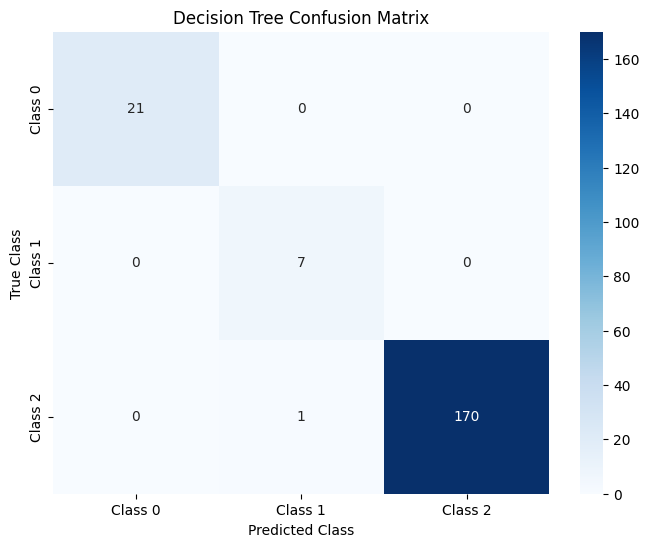

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Decision Tree Classifier model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions with the Decision Tree model
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

# Convert accuracy to percentage
accuracy_percentage_tree = accuracy_tree * 100

# Print accuracy, precision, recall, and F1-score in one output
print(f'Accuracy: {accuracy_percentage_tree:.2f}%')
print(f'Precision: {precision_tree:.2f}')
print(f'Recall: {recall_tree:.2f}')
print(f'F1-Score: {f1_tree:.2f}')

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### Random Forest

Accuracy: 99.50%
Precision: 1.00
Recall: 0.99
F1-Score: 0.99


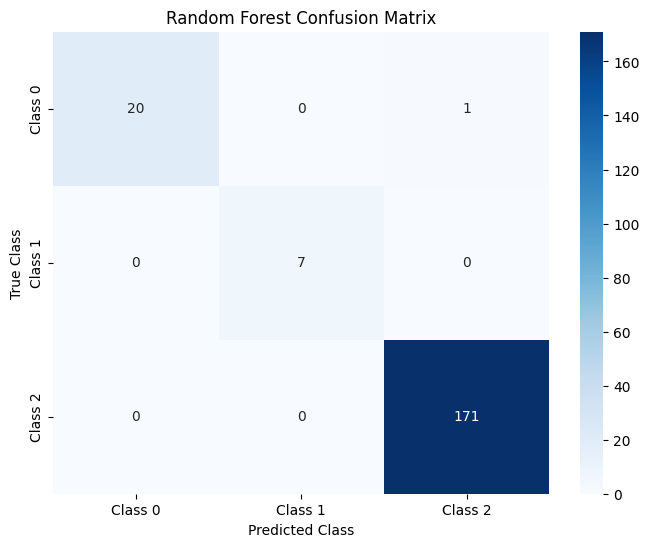

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Convert accuracy to percentage
accuracy_percentage_rf = accuracy_rf * 100

# Print accuracy, precision, recall, and F1-score in one output
print(f'Accuracy: {accuracy_percentage_rf:.2f}%')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-Score: {f1_rf:.2f}')

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### SVM

Accuracy: 94.47%
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


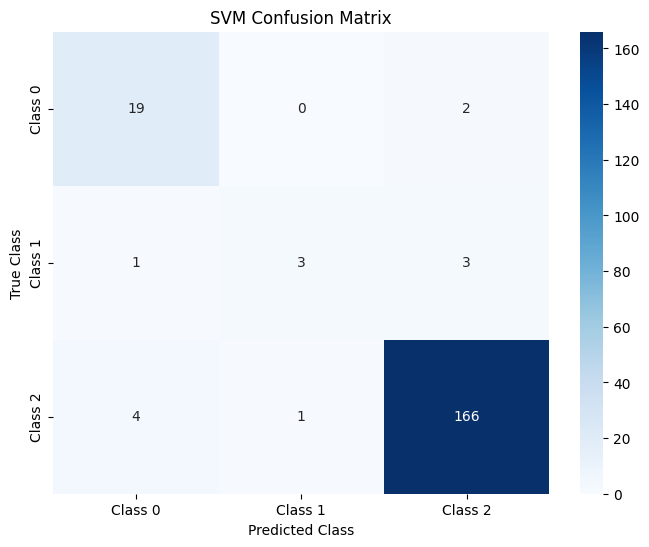

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can change 'linear' to 'rbf', 'poly', or 'sigmoid' for different kernels
svm_model.fit(X_train, y_train)

# Make predictions with the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Convert accuracy to percentage
accuracy_percentage_svm = accuracy_svm * 100

# Print accuracy, precision, recall, and F1-score in one output
print(f'Accuracy: {accuracy_percentage_svm:.2f}%')
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1-Score: {f1_svm:.2f}')

# Plot confusion matrix for SVM
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### K-NN

Accuracy: 93.97%
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


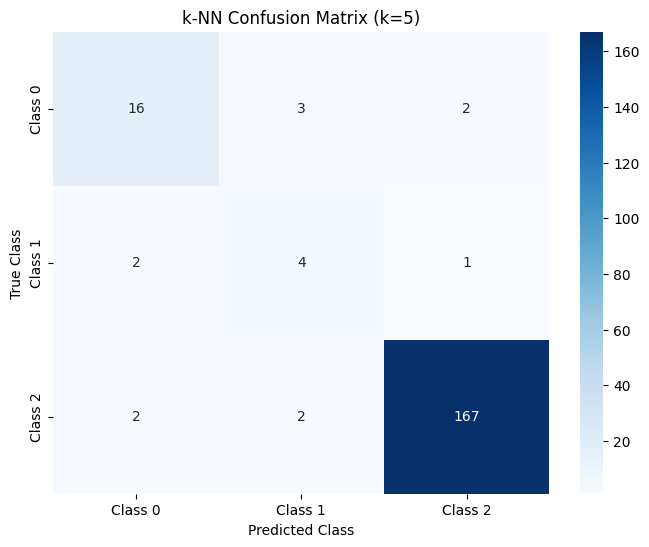

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit k-NN classifier
k = 5  # You can tune the value of k
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions with the k-NN model
y_pred_knn = knn_model.predict(X_test)

# Evaluate the k-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Convert accuracy to percentage
accuracy_percentage_knn = accuracy_knn * 100

# Print accuracy, precision, recall, and F1-score in one output
print(f'Accuracy: {accuracy_percentage_knn:.2f}%')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1-Score: {f1_knn:.2f}')

# Plot confusion matrix for k-NN
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title(f'k-NN Confusion Matrix (k={k})')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### Naive Bayes

Naive Bayes Accuracy: 94.47%
Precision: 0.95
Recall: 0.94
F1-Score: 0.95


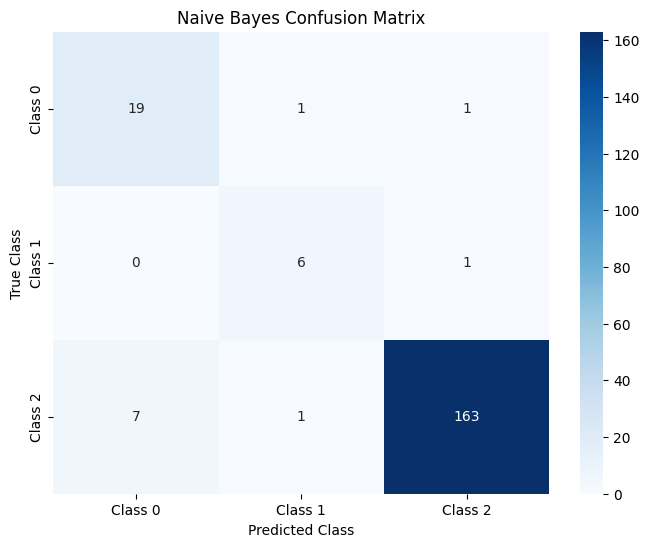

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions with the Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Convert accuracy to percentage
accuracy_percentage_nb = accuracy_nb * 100

# Print the evaluation metrics
print(f'Naive Bayes Accuracy: {accuracy_percentage_nb:.2f}%')
print(f'Precision: {precision_nb:.2f}')
print(f'Recall: {recall_nb:.2f}')
print(f'F1-Score: {f1_nb:.2f}')

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### Gradient Boosting Machines (GBM)

Gradient Boosting Accuracy: 98.49%
Precision: 0.98
Recall: 0.98
F1-Score: 0.98


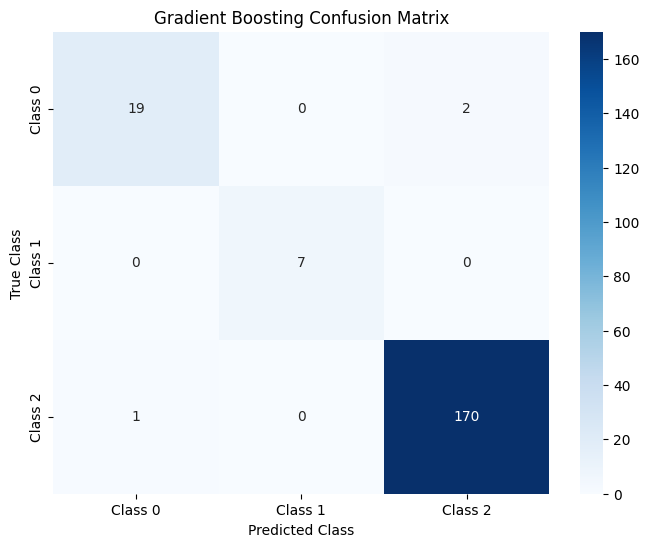

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions with the GBM model
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Convert accuracy to percentage
accuracy_percentage_gbm = accuracy_gbm * 100

# Print the evaluation metrics
print(f'Gradient Boosting Accuracy: {accuracy_percentage_gbm:.2f}%')
print(f'Precision: {precision_gbm:.2f}')
print(f'Recall: {recall_gbm:.2f}')
print(f'F1-Score: {f1_gbm:.2f}')

# Plot confusion matrix for GBM
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gbm), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### Two Layered Neural Network

Checking for NaN values in feature set and target variable:
AGE         0
Urea        0
Cr          0
HbA1c       0
Chol        0
TG          0
HDL         0
LDL         0
VLDL        0
BMI         0
Gender_M    0
Gender_f    0
dtype: int64
0
Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5560 - loss: 1.0026 - val_accuracy: 0.8250 - val_loss: 0.6642
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: 0.6062 - val_accuracy: 0.8250 - val_loss: 0.4827
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8543 - loss: 0.4416 - val_accuracy: 0.8438 - val_loss: 0.3879
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8976 - loss: 0.3231 - val_accuracy: 0.8875 - val_loss: 0.3365
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9247 - loss: 0.2716 - val_accuracy: 0.8875 - val_loss: 0.3068
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9166 - loss: 0.2434 - val_accuracy: 0.9000 - val_loss: 0.2859
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9119 - loss: 0.2227 - val_accuracy: 0.9000 - val_loss: 0.2767
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9048 - loss: 0.2249 - val_accuracy: 0.9125 - val_loss: 0

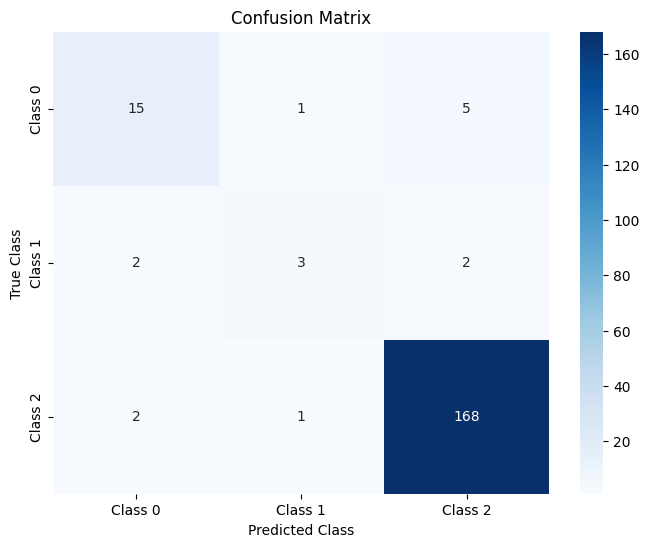

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Ensure there are no NaN values in the feature set or target
print("Checking for NaN values in feature set and target variable:")
print(X.isna().sum())
print(y.isna().sum())

# Standardize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),  # Second layer with 32 neurons and ReLU activation
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert y_test from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100

# Print evaluation metrics
print(f'Accuracy: {accuracy_percentage:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Plot confusion matrix
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### Data Preparation and LSTM Model

Checking for NaN values in feature set and target variable:
AGE         0
Urea        0
Cr          0
HbA1c       0
Chol        0
TG          0
HDL         0
LDL         0
VLDL        0
BMI         0
Gender_M    0
Gender_f    0
dtype: int64
0
Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6725 - loss: 1.0593 - val_accuracy: 0.8313 - val_loss: 0.9572
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.9097 - val_accuracy: 0.8250 - val_loss: 0.7721
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.6974 - val_accuracy: 0.8250 - val_loss: 0.5615
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.5086 - val_accuracy: 0.8313 - val_loss: 0.4131
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8877 - loss: 0.3364 - val_accuracy: 0.8687 - val_loss: 0.3359
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9052 - loss: 0.3076 - val_accuracy: 0.8938 - val_loss: 0.3019
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8996 - loss: 0.2538 - val_accuracy: 0.8938 - val_loss: 0.2819
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9088 - loss: 0.2248 - val_accuracy: 0.8938 - val_loss: 0.2

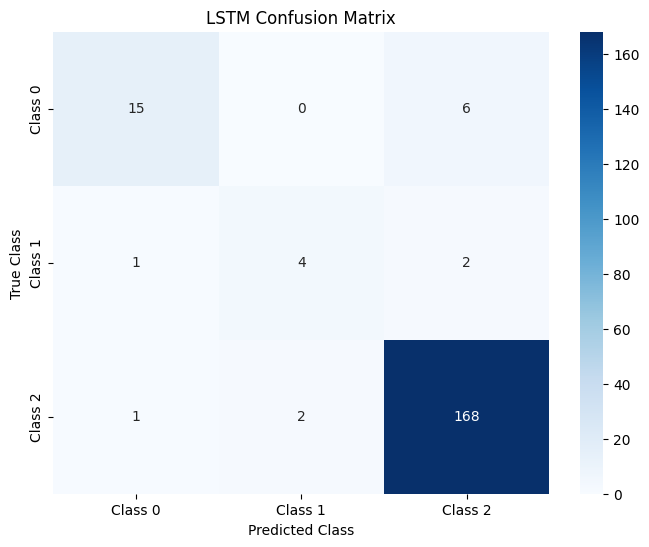

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Ensure there are no NaN values in the feature set or target
print("Checking for NaN values in feature set and target variable:")
print(X.isna().sum())
print(y.isna().sum())

# Convert target variable to categorical
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to be 3D for LSTM (samples, timesteps, features)
X_train_3d = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_3d = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize and compile LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])),
        Dense(32, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate LSTM model
lstm_model = build_lstm_model()
history_lstm = lstm_model.fit(X_train_3d, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions with LSTM model
y_pred_prob_lstm = lstm_model.predict(X_test_3d)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

# Convert y_test from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the LSTM model
accuracy_lstm = accuracy_score(y_test_labels, y_pred_lstm)
precision_lstm = precision_score(y_test_labels, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test_labels, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test_labels, y_pred_lstm, average='weighted')
conf_matrix_lstm = confusion_matrix(y_test_labels, y_pred_lstm)

# Convert accuracy to percentage
accuracy_percentage_lstm = accuracy_lstm * 100

# Print the results
print(f'LSTM Accuracy: {accuracy_percentage_lstm:.2f}%')
print(f'LSTM Precision (Weighted): {precision_lstm:.2f}')
print(f'LSTM Recall (Weighted): {recall_lstm:.2f}')
print(f'LSTM F1-Score (Weighted): {f1_lstm:.2f}')

# Plot confusion matrix for LSTM
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### BiLSTM Model

Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5762 - loss: 1.0516 - val_accuracy: 0.8250 - val_loss: 0.8559
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.7723 - val_accuracy: 0.8250 - val_loss: 0.6054
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.5200 - val_accuracy: 0.8250 - val_loss: 0.4418
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.3974 - val_accuracy: 0.8313 - val_loss: 0.3626
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8816 - loss: 0.3136 - val_accuracy: 0.8750 - val_loss: 0.3217
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9104 - loss: 0.2795 - val_accuracy: 0.8813 - val_loss: 0.2989
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8942 - loss: 0.2565 - val_accuracy: 0.8938 - val_loss: 0.2805
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.2607 - val_accuracy: 0.8938 - val_loss: 0.

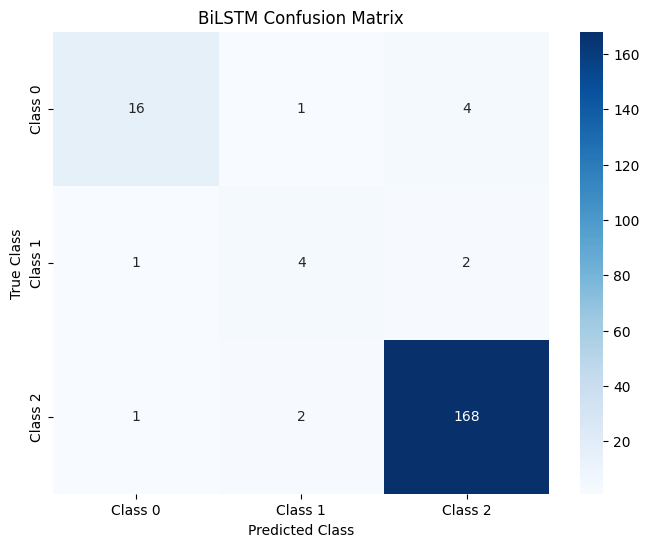

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)  # Features
y = data['CLASS']  # Target

# Convert target variable to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')

# Drop rows where the target variable is NaN after conversion
data = data.dropna(subset=['CLASS'])
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Convert target variable to categorical
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to be 3D for LSTM (samples, timesteps, features)
X_train_3d = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_3d = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize and compile BiLSTM model
def build_bilstm_model():
    model = Sequential([
        Bidirectional(LSTM(64, activation='relu'), input_shape=(1, X_train.shape[1])),
        Dense(32, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate BiLSTM model
bilstm_model = build_bilstm_model()
history_bilstm = bilstm_model.fit(X_train_3d, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions with BiLSTM model
y_pred_prob_bilstm = bilstm_model.predict(X_test_3d)
y_pred_bilstm = np.argmax(y_pred_prob_bilstm, axis=1)

# Convert y_test from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the BiLSTM model
accuracy_bilstm = accuracy_score(y_test_labels, y_pred_bilstm)
precision_bilstm = precision_score(y_test_labels, y_pred_bilstm, average='weighted')
recall_bilstm = recall_score(y_test_labels, y_pred_bilstm, average='weighted')
f1_bilstm = f1_score(y_test_labels, y_pred_bilstm, average='weighted')
conf_matrix_bilstm = confusion_matrix(y_test_labels, y_pred_bilstm)

# Convert accuracy to percentage
accuracy_percentage_bilstm = accuracy_bilstm * 100

# Print evaluation metrics
print(f'BiLSTM Accuracy: {accuracy_percentage_bilstm:.2f}%')
print(f'BiLSTM Precision (Weighted): {precision_bilstm:.2f}')
print(f'BiLSTM Recall (Weighted): {recall_bilstm:.2f}')
print(f'BiLSTM F1-Score (Weighted): {f1_bilstm:.2f}')

# Plot confusion matrix for BiLSTM
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_bilstm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('BiLSTM Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### Voting Classifier

The code implements a Voting Classifier, which is an ensemble learning method that combines the predictions from multiple machine learning algorithms to improve overall performance. In this specific example, the Voting Classifier combines three algorithms:

Random Forest Classifier: A robust ensemble method based on decision trees.
Gradient Boosting Classifier: An ensemble technique that builds trees sequentially to correct errors made by previous trees.
Logistic Regression: A simple but effective linear model for binary or multi-class classification.
This combination leverages the strengths of each algorithm, often resulting in better performance than any single model. The ensemble method is particularly useful in improving prediction accuracy and robustness against overfitting.

      Metric     Score
0   Accuracy  0.984925
1  Precision  0.984732
2     Recall  0.984925
3   F1 Score  0.984763


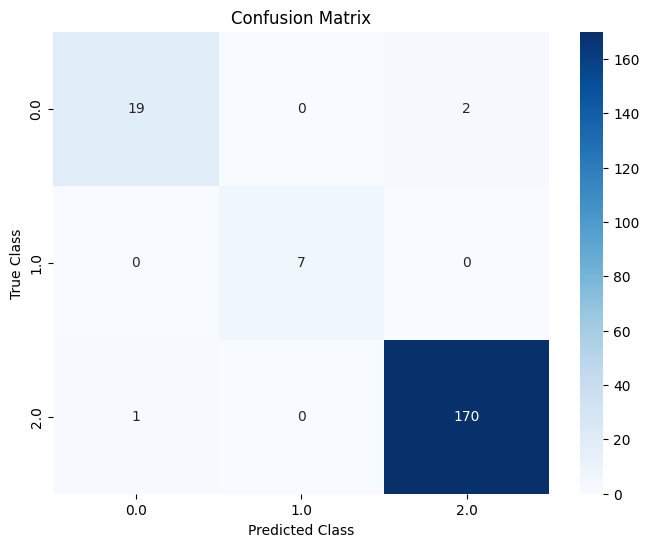

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target variable
data = data.dropna(subset=['CLASS'])

# Prepare features and target variable
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model3 = LogisticRegression(max_iter=500)

# Combine models in a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', model1),
    ('gb', model2),
    ('lr', model3)],
    voting='hard'  # Use 'soft' for probabilistic voting
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Display the summary table
print(metrics_summary)

# Optionally, visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
